In [370]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [371]:
def binaryToNumber(n):
  return int(n , 2)

In [372]:
qc = QuantumCircuit(4, 4)

In [373]:
qc.h(0)
qc.cx(0, 2)

In [374]:
qc.h(1)
qc.cx(1, 3)

In [375]:
qc.measure(0, 0)
qc.measure(1, 1)

In [376]:
qc.measure(2, 2)
qc.measure(3, 3)

In [377]:
simulator = AerSimulator()
job = simulator.run(qc, shots=1)
result = job.result()
counts = result.get_counts()

In [378]:
binary_result = list(counts.keys())[0]
entangled_bits = binary_result[0] + binary_result[1]
original_bits = binary_result[2] + binary_result[3]

In [379]:
entangled_number = binaryToNumber(entangled_bits)
original_number = binaryToNumber(original_bits)

In [380]:
print(f"Measured Q[0,1] = {original_bits} (Decimal: {original_number})")
print(f"Measured Q[2,3] = {entangled_bits} (Decimal: {entangled_number})")

if entangled_bits == original_bits:
    print("✅ Match: Entangled qubits reflect the superposition result.")
else:
    print("❌ Mismatch: Entangled qubits do NOT match the measured pair.")

Measured Q[0,1] = 00 (Decimal: 0)
Measured Q[2,3] = 00 (Decimal: 0)
✅ Match: Entangled qubits reflect the superposition result.


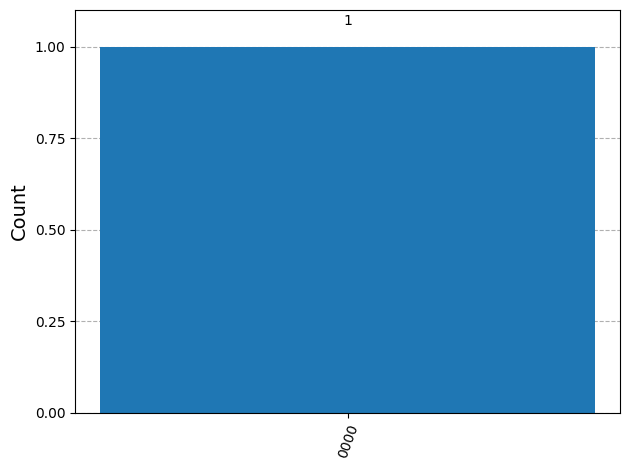

In [381]:
%matplotlib inline
plot_histogram(counts)
plt.show()